In [708]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
import seaborn as sns



In [1273]:
W = 0.5

import pandas as pd
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')
#remouve nan values
anime = anime.dropna()
rating = rating.dropna()


rating['user_id'] = rating['user_id'].astype(str)
rating['anime_id'] = rating['anime_id'].astype(str)
#changing the type of anime id to string 
anime["anime_id"] = anime["anime_id"].astype(str)

unique_user_ids = list(rating.user_id.unique())
unique_anime_ids = list(anime.anime_id.unique())
unique_genres = list(anime.genre.unique())
unique_types = list(anime.type.unique())
unique_ratings = list(rating.rating.unique())

##normalising the ratings of each user to be between -1 and 1 by subtracting the mean of the ratings of each user and removing the -1
rating['rating'] = rating['rating'].astype(float)

#removing -1 ratings
#ploting the distribution of the ratings with a box plot




rating = rating[rating['rating']!=-1]

#creating a new column for the binary ratings


rating['normalized_rating_1'] = rating.groupby('user_id')['rating'].transform(lambda x: (x - x.mean()))

rating['normalized_rating_2'] = rating.groupby('user_id')['rating'].transform(lambda x: (x - x.mean())/(x.max()-x.min()))
rating['normalized_rating_3'] = rating.groupby('user_id')['rating'].transform(lambda x: (x - x.mean())/(x.std()))


rating['binary_rating'] = rating['rating'].apply(lambda x: 1 if x>=0 else 0)

#renanaming the column rating to anime_rating

anime = anime.rename(columns={'rating':'anime_rating'})
#calculating the popularity of each anime by deviding the members by the top 90 percentile of the members

quantile = anime['members'].quantile(0.9)

anime['popularity'] = np.log(anime['members'])/np.log(anime['members'].max())
#set polularity to be maximum of 1 buy setting the ones who surpass the 90 percentile to 1



#anime['popularity'] = anime['members']/anime['members'].max()



#adding an iteraction factor beween the rating and the popularity of the anime
anime['anime_rating_weighted'] = anime['popularity']*anime['anime_rating']*W + (1-W)*anime['anime_rating']



#remouving NAN values
rating = rating.dropna()




In [780]:
print(anime['members'].quantile(0.95))
print(anime['members'].max())

94483.39999999973
1013917


ValueError: could not convert string to float: 'Unknown'

In [710]:
rating

,user_id,anime_id,rating,normalized_rating_1,normalized_rating_2,normalized_rating_3,binary_rating
156,3,20,8.0,0.434783,0.062112,0.280517,1
157,3,154,6.0,-1.565217,-0.223602,-1.009861,1
158,3,170,9.0,1.434783,0.204969,0.925706,1
159,3,199,10.0,2.434783,0.347826,1.570895,1
160,3,225,9.0,1.434783,0.204969,0.925706,1
...,...,...,...,...,...,...,...
7813730,73515,13659,8.0,-0.547486,-0.109497,-0.481274,1
7813731,73515,14345,7.0,-1.547486,-0.309497,-1.360336,1
7813732,73515,16512,7.0,-1.547486,-0.309497,-1.360336,1
7813733,73515,17187,9.0,0.452514,0.090503,0.397788,1


In [711]:
anime.head(20)

,anime_id,name,genre,type,episodes,anime_rating,members,popularity,anime_rating_weighted
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0.197876,1.854100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0.782771,7.248461
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0.112694,1.042416
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0.664327,6.091875
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0.149190,1.366578
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,0.092070,0.842437
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,0.420010,3.834689
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,0.079572,0.724897
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,0.071538,0.650999
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,0.079996,0.728761


In [712]:
#printing the top 10 most popular animes
print(anime.sort_values(by='members', ascending=False).head(20))

    anime_id                                name  \
40      1535                          Death Note   
86     16498                  Shingeki no Kyojin   
804    11757                    Sword Art Online   
1       5114    Fullmetal Alchemist: Brotherhood   
159     6547                        Angel Beats!   
19      1575     Code Geass: Hangyaku no Lelouch   
841       20                              Naruto   
3       9253                         Steins;Gate   
445    10620                    Mirai Nikki (TV)   
131     4224                           Toradora!   
582      269                              Bleach   
760      226                          Elfen Lied   
449    22319                         Tokyo Ghoul   
118    19815                     No Game No Life   
200      121                 Fullmetal Alchemist   
288     6702                          Fairy Tail   
643     9919                      Ao no Exorcist   
440     3588                          Soul Eater   
13      2904

<Axes: xlabel='anime_rating_weighted'>

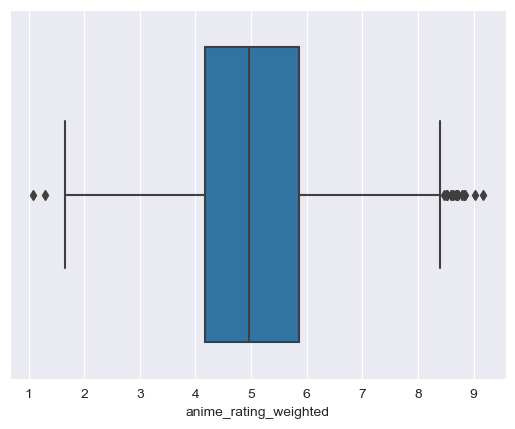

In [897]:
#distribution of binary ratings using a histogram

sns.boxplot(x=anime['anime_rating_weighted'])

<Axes: xlabel='popularity'>

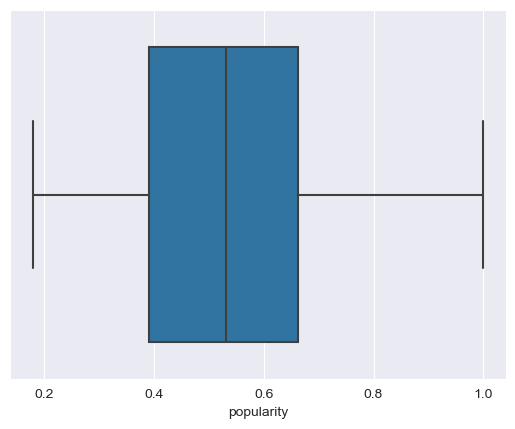

In [896]:
sns.boxplot(x=anime['popularity'])

<Axes: xlabel='normalized_rating_2', ylabel='Count'>

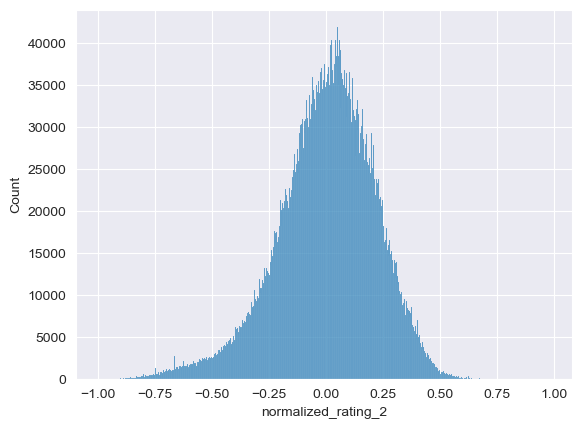

In [714]:
sns.histplot(x=rating['normalized_rating_2'])

<Axes: xlabel='normalized_rating_3', ylabel='Count'>

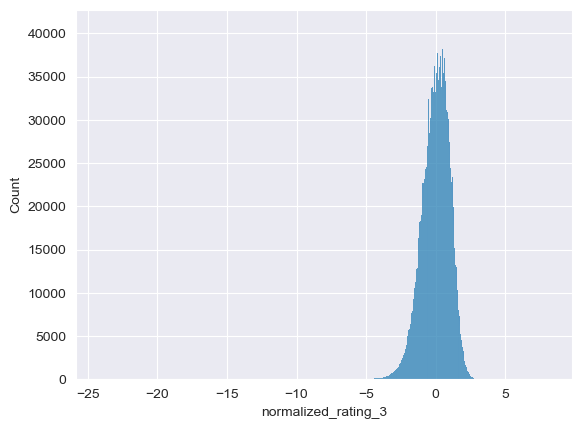

In [407]:
sns.histplot(x=rating['normalized_rating_3'])

<Axes: xlabel='anime_rating'>

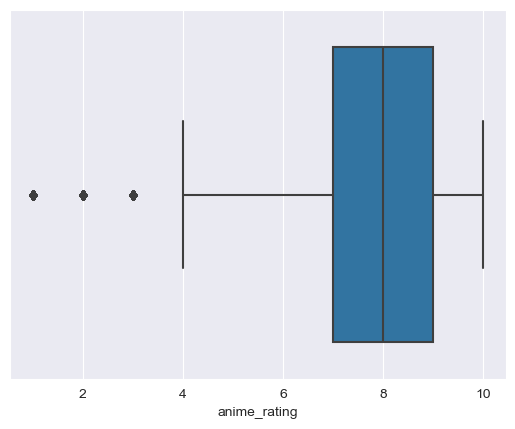

In [286]:
#ploting the distribution of the ratings with a box plot
import seaborn as sns
sns.boxplot(x=rating['anime_rating'])



In [1277]:
unique_user_ids = np.unique(unique_user_ids)
unique_anime_ids = np.unique(unique_anime_ids)
unique_genres = np.unique(unique_genres)
unique_types = np.unique(unique_types)


In [1278]:
#preaparing the data for the model
columns = ['anime_id','genre',"anime_rating","popularity","anime_rating_weighted","type"]

data = rating.merge(anime[columns], on='anime_id')
#dropping the columns that are not needed
print(data)


        user_id anime_id  rating  normalized_rating_1  normalized_rating_2  \
0             3       20     8.0             0.434783             0.062112   
1             5       20     6.0             1.644880             0.182764   
2            21       20     8.0             0.377778             0.047222   
3            28       20     9.0            -0.454545            -0.454545   
4            34       20     9.0             0.285714             0.095238   
...         ...      ...     ...                  ...                  ...   
6304671   69964    23585     7.0            -0.891859            -0.178372   
6304672   69964    33659     6.0            -1.891859            -0.378372   
6304673   72800    30738     4.0            -1.930159            -0.241270   
6304674   73135     8723     5.0            -0.710953            -0.078995   
6304675   73188     8749     6.0            -0.998418            -0.110935   

         normalized_rating_3  binary_rating  \
0               

In [1279]:

ratings = tf.data.Dataset.from_tensor_slices(dict(rating))
data = tf.data.Dataset.from_tensor_slices(dict(data))

In [1061]:
tf.random.set_seed(42)
shuffled = data.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

In [1205]:


class RankingModel(tf.keras.Model):

  def __init__(self,binary=False):
    super().__init__()
    self.binary = binary
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # Compute embeddings for movies.
    self.anime_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_anime_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_anime_ids) + 1, embedding_dimension)
    ])
    self.genre_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_genres, mask_token=None),
      tf.keras.layers.Embedding(len(unique_genres) + 1, embedding_dimension)
    ])
    #one hot vector for the type
    
    
    self.type_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_types, mask_token=None),
      tf.keras.layers.Embedding(len(unique_types) + 1, 4)
    
    ])
    
    
    self.item_importance = tf.keras.Sequential([
        
        tf.keras.layers.Dense(64, activation="linear"),
        
        tf.keras.layers.Dense(32, activation="linear"),
      
      
    ])

    # Compute predictions.
    if binary:
      self.ratings = tf.keras.Sequential([
       
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.01))
      ])
    else:
      self.ratings = tf.keras.Sequential([
        
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))
      ])
    
      
  def item_embedding(self, anime_id, genre, type):
    anime_embedding = self.anime_embeddings(anime_id)
    genre_embedding = self.genre_embeddings(genre)
    type_embedding = self.type_embeddings(type)
    return (anime_embedding + genre_embedding + type_embedding) / 3.0

  def call(self, inputs):

    user_id, anime_id, genre,rating, popularity ,type= inputs
    

    
    user_embedding = self.user_embeddings(user_id)
    anime_embedding = self.anime_embeddings(anime_id)
    
    #converting the rating to a tensor
    anime_rating = tf.convert_to_tensor(rating, dtype=tf.float32)
    anime_rating = tf.expand_dims(anime_rating, axis=1)
    
    anime_popularity = tf.convert_to_tensor(popularity, dtype=tf.float32)
    anime_popularity = tf.expand_dims(anime_popularity, axis=1)
    
    genre_embedding = self.genre_embeddings(genre)
    
    type_embedding = self.type_embeddings(type)

  
    
    item = tf.concat([anime_embedding, genre_embedding,type_embedding], axis=1)
    item = self.item_importance(item)
    
    return self.ratings(tf.concat([user_embedding,item,anime_popularity], axis=1))

In [1206]:
task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

task_binary = tfrs.tasks.Ranking(
  loss = tf.keras.losses.BinaryCrossentropy(),
  metrics=[tf.keras.metrics.BinaryAccuracy()]
)


In [1207]:
class AnimeModel(tfrs.models.Model):

  def __init__(self,binary=False):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel(binary)
    self.binary = binary
    if binary:
      self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
      )
    else:
      self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss = tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["anime_id"], features["genre"], features["anime_rating"],features["anime_rating_weighted"],features["type"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    """labels = features.pop("rating")

    rating_predictions = self(features)
    """
    features = features.copy()  # Make a shallow copy of features
    if self.binary:
      labels = features.pop("binary_rating")
    else:
      labels = features.pop("rating")
        
    
    rating_predictions = self(features)

    # The task computes the loss and the metrics.
  
    return self.task(labels=labels, predictions=rating_predictions)

    

In [1210]:
model = AnimeModel(binary=False)

In [1211]:


cached_train = train.shuffle(10_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.1)

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate_schedule,clipnorm=0.001))

In [1212]:
#adding the learning rate 

two_layer_history = model.fit(cached_train, epochs=700,validation_data=cached_test)

Epoch 1/700


/Users/yassine/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'anime_model_83', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 73.0566 - regularization_loss: 1.7207 - root_mean_squared_error: 8.5236 - total_loss: 74.7773 - val_loss: 73.7753 - val_regularization_loss: 1.7207 - val_root_mean_squared_error: 8.5541 - val_total_loss: 75.4960
Epoch 2/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.3856 - regularization_loss: 1.7207 - root_mean_squared_error: 8.4264 - total_loss: 73.1064 - val_loss: 72.1490 - val_regularization_loss: 1.7207 - val_root_mean_squared_error: 8.4584 - val_total_loss: 73.8697
Epoch 3/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 69.7350 - regularization_loss: 1.7207 - root_mean_squared_error: 8.3291 - total_loss: 71.4557 - val_loss: 70.5511 - val_regularization_loss: 1.7207 - val_root_mean_squared_error: 8.3633 - val_total_loss: 72.2718
Epoch 4/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 68.1401 - regularization_loss: 1.7207 - root_mean_squared_error: 8.2335 - total_loss: 69.8608 - val_loss: 69.0142 - val_regularization_lo

In [1213]:


model.evaluate(cached_test, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9840 - regularization_loss: 1.5708 - root_mean_squared_error: 1.4200 - total_loss: 3.5547


{'loss': 1.9361134767532349,
 'regularization_loss': 1.5707812309265137,
 'root_mean_squared_error': 1.4124096632003784,
 'total_loss': 3.506894588470459}

In [1214]:

accuracy = two_layer_history.history
loss = accuracy['loss']

val_loss = accuracy['val_loss']


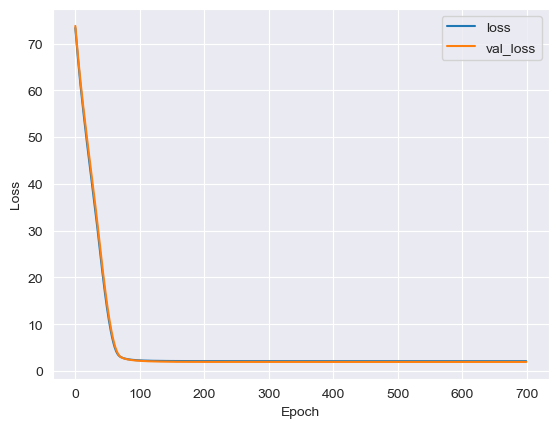

In [1215]:
#plotting the loss
import matplotlib.pyplot as plt
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plotting other metrics 


<Axes: >

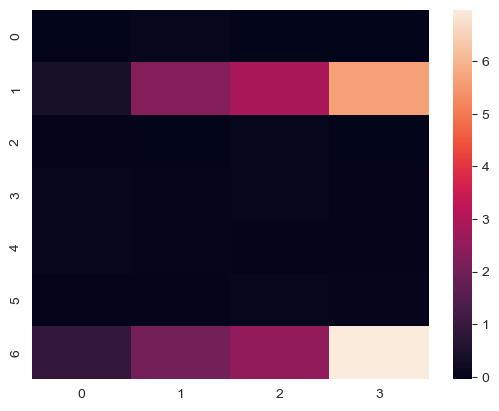

In [1275]:
#print the weights of the model and build a heat map out of it 

weights = model.ranking_model.get_weights()

sns.heatmap(weights[3])


In [1282]:
rating_new = pd.read_csv('rating.csv')
rating_new['user_id'] = rating_new['user_id'].astype(str)
rating_new['anime_id'] = rating_new['anime_id'].astype(str)
rating_new = rating_new.dropna()
rating_new['rating'] = rating_new['rating'].astype(float)


In [1296]:
from sklearn.metrics.pairwise import cosine_similarity
#getting the top k movies for a user using similarity model of the embeddings
# Get the embeddings of the animes for the first user in the dataset
user_id = "3"
print(user_id)
user_id = tf.convert_to_tensor([user_id])
anime_embeddings = model.ranking_model.anime_embeddings(anime['anime_id']) 
user_embedding = model.ranking_model.user_embeddings(user_id)  

# Compute the similarity between user and anime embeddings using cosine similarity 

similarity = cosine_similarity(user_embedding, anime_embeddings)
print(similarity)
similarity = similarity[0]


#similarity = tf.reduce_sum(user_embeddings * anime_embeddings, axis=1)
# Get the top 10 most similar animes

top_animes = pd.DataFrame({
    'anime_id': anime['anime_id'],
    'similarity': similarity
})
top_animes = top_animes.sort_values(by='similarity', ascending=False).head(10)
top_animes = top_animes.merge(anime, on='anime_id')

print(user_id)
print(top_animes)

#cheking how many of the top animes are in the users ratings
top_animes = top_animes.merge(rating[rating["user_id"]=="3"], on='anime_id')
print(top_animes[['anime_id', 'name']]) 

#printing the top 10 users that are similar to the user
unique_user_ids = unique_user_ids
user_embeddings = model.ranking_model.user_embeddings(unique_user_ids)

similarity = cosine_similarity(user_embedding, user_embeddings)


top_users = pd.DataFrame({
    'user_id': unique_user_ids,
    'similarity': similarity[0]
})
top_users = top_users.sort_values(by='similarity', ascending=False).head(2)
print("#############")
print(top_users)
#printing the second uer that is similar to the user

#in order to verify the results we can check the ratings of the second top users and see if they are similar to the user
top_users_2 = top_users.merge(rating_new[rating_new["user_id"]==top_users.iloc[1]['user_id']], on='user_id')
print(top_users_2[['user_id', 'rating','anime_id']])
top_users_3 = top_users.merge(rating_new[rating_new["user_id"]==top_users.iloc[0]['user_id']], on='user_id')
#intersectting woth top_users_2 and top_users_3 using the anime_id
top_users_4 = top_users_3.merge(top_users_2, on='anime_id')

print(top_users_4[["user_id_x","user_id_y","anime_id","rating_x","rating_y"]])


#createing a function that will return the top k similar users to a user

def top_k_similar_users(user_id,model,k=10):
    user_id = tf.convert_to_tensor([user_id])
    user_embeddings = model.ranking_model.user_embeddings(unique_user_ids)
    user_embedding = model.ranking_model.user_embeddings(user_id)  

    # Compute the similarity between user and anime embeddings using cosine similarity 
    
    similarity = cosine_similarity(user_embedding, user_embeddings)
    similarity = similarity[0]
    
    top_users = pd.DataFrame({
        'user_id': unique_user_ids,
        'similarity': similarity,
    })
    
    top_users = top_users.sort_values(by='similarity', ascending=False).head(k)
    return top_users    
print(top_k_similar_users("3",model,10))

3
[[ 0.13579752 -0.09851274  0.1555482  ...  0.04008859  0.11615811
  -0.00082812]]
tf.Tensor([b'3'], shape=(1,), dtype=string)
  anime_id  similarity                                    name  \
0    13145    0.619174  Cardfight!! Vanguard: Asia Circuit-hen   
1    13935    0.586905                     Houkago Midnighters   
2     8184    0.569118                      Bouken Gabotenjima   
3     7290    0.567210               Cyborg 009: Kaijuu Sensou   
4    31008    0.565228   Makeruna! Senta: Sayonara Ijime Mushi   
5    22157    0.555712                       Yasashii Kinyoubi   
6     4921    0.545225     Ramayana: The Legend of Prince Rama   
7    32255    0.541212                          Ashita Kirarin   
8     3046    0.533081           Shiroki Tenshi-tachi no Rondo   
9    28309    0.526640                   Oni Chichi 2: Harvest   

                                      genre   type episodes  anime_rating  \
0  Action, Adventure, Demons, Game, Shounen     TV       39         

In [1299]:
#importing eqlidian distance


def similarity(anime_id,model,anime,k=10):
    anime_id = tf.convert_to_tensor([anime_id])
    
    anime_embeddings = model.ranking_model.anime_embeddings(anime['anime_id'])
    anime_embedding = model.ranking_model.anime_embeddings(anime_id)
    
    anime_genre_tensor = tf.convert_to_tensor([anime[anime['anime_id'] == anime_id]['genre'].values[0]])
    genre_embeddings = model.ranking_model.genre_embeddings(anime['genre'])
    genre_embedding = model.ranking_model.genre_embeddings(anime_genre_tensor)
    
    
    anime_type_tensor = tf.convert_to_tensor([anime[anime['anime_id'] == anime_id]['type'].values[0]])
    type_embeddings = model.ranking_model.type_embeddings(anime['type'])
    type_embedding = model.ranking_model.type_embeddings(anime_type_tensor)
    
    item = tf.concat([anime_embedding, genre_embedding,type_embedding], axis=1)
    item = model.ranking_model.item_importance(item)
    
    items = tf.concat([anime_embeddings, genre_embeddings,type_embeddings], axis=1)
    items = model.ranking_model.item_importance(items)
    
    similarity = cosine_similarity(item, items)
    distance = tf.norm(item-items, axis=1)
    
    similarity = similarity[0]
    top_anime = pd.DataFrame({
        'anime_id': anime['anime_id'],
        'similarity': similarity,
    })
    top_anime = top_anime.sort_values(by='similarity', ascending=False).head(k)
    return top_anime

top_items = similarity("11061",model,anime)

top_items = top_items.sort_values(by='similarity', ascending=False).head(10)
top_items = top_items.merge(anime, on='anime_id')

print(top_items[['anime_id', 'name','similarity', 'genre' , 'type' ]])





  anime_id                                               name  similarity  \
0    11061                             Hunter x Hunter (2011)    1.000000   
1    27943                                      Nano Invaders    0.999906   
2      136                                    Hunter x Hunter    0.999886   
3      156                                                  X    0.999871   
4     3162                             Makiba no Shoujo Katri    0.999866   
5     7079                                      Ookamikakushi    0.999850   
6      274                                        Kiddy Grade    0.999850   
7       65                             Rozen Maiden: Träumend    0.999844   
8    31890                          Nurse Witch Komugi-chan R    0.999841   
9     9598  Haiyoru! Nyaruani: Remember My Love(craft-sensei)    0.999840   

                                               genre type  
0            Action, Adventure, Shounen, Super Power   TV  
1            Action, Adventure, 

In [1300]:

#putting this into a fucntion that takes the model, the user id and dataframe of the animes and returns the animes rated 

def rate(model,user_id,anime,candidates=None):
    
    anime['user_id'] = user_id
    #if candidates is not none then we will only predict the ratings for the candidates
    if candidates is not None:
        anime = anime[anime['anime_id'].isin(candidates)]
    # Convert DataFrame to TensorFlow dataset
    anime_features = tf.data.Dataset.from_tensor_slices(dict(anime))
    anime_features = anime_features.batch(1)

    # Predict ratings for all animes

    
    predictions = []
    for batch in anime_features:
        user_id_tensor = batch['user_id']
        anime_id_tensor = batch['anime_id']
        genre_tensor = batch['genre']
        rating_tensor = batch['anime_rating']
        popularity = batch['anime_rating_weighted']
        anime_type = batch["type"]

   
        rating_prediction = model({
            "user_id": user_id_tensor,
            "anime_id": anime_id_tensor,
            "genre": genre_tensor,
            "anime_rating": rating_tensor,
            "anime_rating_weighted": popularity,
            "type":anime_type

        })
   
        predictions.append({
            'anime_id': anime_id_tensor.numpy()[0].decode('utf-8'), 
            'predicted_rating': rating_prediction.numpy()[0][0],
        })

    # Create a new DataFrame with the predictions
    predictions_df = pd.DataFrame(predictions)

    # Print the DataFrame with anime IDs and their predicted ratings

    return predictions_df

"""personal_rating = rating_new[rating_new["user_id"]==user_id]
p_rating = personal_rating[personal_rating['anime_id']==anime_id_tensor.numpy()[0].decode('utf-8')]['rating']
  "oroginal_rating": p_rating.values[0] if len(p_rating)>0 else "No rating"
    })

"""
print(rate(model,"5",anime))

KeyboardInterrupt: 

In [1302]:
####
# The strategy is as follows: 
# if we want to recommend something to a user, we will first get the top k similar users to the user.
# then we will pick all the animes that the user interacted with 
# then we can get similar animes to the animes that the user interacted with
# and the final step is to re rate everything using the model 
# and return the top k animes that the user will like
####

import tqdm
def recommend(model,user_id,anime,number_of_animes=10,number_of_users=10):
    #get the top k similar users to the user
    top_users = top_k_similar_users(user_id,model,number_of_users)
    
    #get the animes that the users interacted with | similar users it means that they interacted with the same animes and moslty rated them the same
    #but sometimes users can have a prefrence for a specific genre or type of anime
    # so we pick every anime that the user interacted with and reratethem using the model
    
    user_animes = rating_new[rating_new["user_id"].isin(top_users['user_id'])]
    #get the top k similar animes to the animes that the user interacted with
    top_animes = []
    pbar = tqdm.tqdm(total=len(user_animes))
    for anime_id in user_animes['anime_id']:
        top_animes.append(similarity(anime_id,model,anime,k=1))
        pbar.update(1)
    top_animes = pd.concat(top_animes)
    #get the top k animes that the user will like
    top_animes = top_animes.sort_values(by='similarity', ascending=False).head(number_of_animes)
    top_animes = top_animes.merge(anime, on='anime_id')
    return top_animes

print(recommend(model,"5",anime,10,1))


 18%|█▊        | 83/467 [01:34<07:22,  1.15s/it]

KeyboardInterrupt: 

  anime_id  predicted_rating oroginal_rating  \
0      199          8.909827             8.0   
1     1535          8.807117             4.0   
2     5114          8.785513       No rating   
3     9253          8.711447             9.0   
4    11061          8.644003       No rating   
5     2904          8.625997       No rating   
6     4181          8.599497       No rating   
7     1575          8.569681       No rating   
8      918          8.556110             9.0   
9    28891          8.554829             9.0   

                                 name  \
0       Sen to Chihiro no Kamikakushi   
1                          Death Note   
2    Fullmetal Alchemist: Brotherhood   
3                         Steins;Gate   
4              Hunter x Hunter (2011)   
5  Code Geass: Hangyaku no Lelouch R2   
6                Clannad: After Story   
7     Code Geass: Hangyaku no Lelouch   
8                             Gintama   
9             Haikyuu!! Second Season   

                   

In [1222]:
#using 

['5602' '23003' '16371' '10743' '31486' '18321' '8839' '713' '23517'
 '2492']
tf.Tensor([b'5602'], shape=(1,), dtype=string)
['Fantasy, Music']
tf.Tensor([b'23003'], shape=(1,), dtype=string)
['Historical, Slice of Life']
tf.Tensor([b'16371'], shape=(1,), dtype=string)
['Comedy, Slice of Life']
tf.Tensor([b'10743'], shape=(1,), dtype=string)
['Drama']
tf.Tensor([b'31486'], shape=(1,), dtype=string)
['Comedy, Mystery, Super Power']
tf.Tensor([b'18321'], shape=(1,), dtype=string)
['Action, Adventure, Drama, Fantasy, Historical, Magic, Shounen']
tf.Tensor([b'8839'], shape=(1,), dtype=string)
['Adventure, Mecha, Space']
tf.Tensor([b'713'], shape=(1,), dtype=string)
['Drama, Romance, Supernatural']
tf.Tensor([b'23517'], shape=(1,), dtype=string)
['Music']
tf.Tensor([b'2492'], shape=(1,), dtype=string)
['Drama, Romance, Sports']
tf.Tensor([b'16377'], shape=(1,), dtype=string)
['Comedy, Slice of Life']
tf.Tensor([b'5259'], shape=(1,), dtype=string)
['Fantasy, Hentai, Magic']
tf.Tensor([b'3032

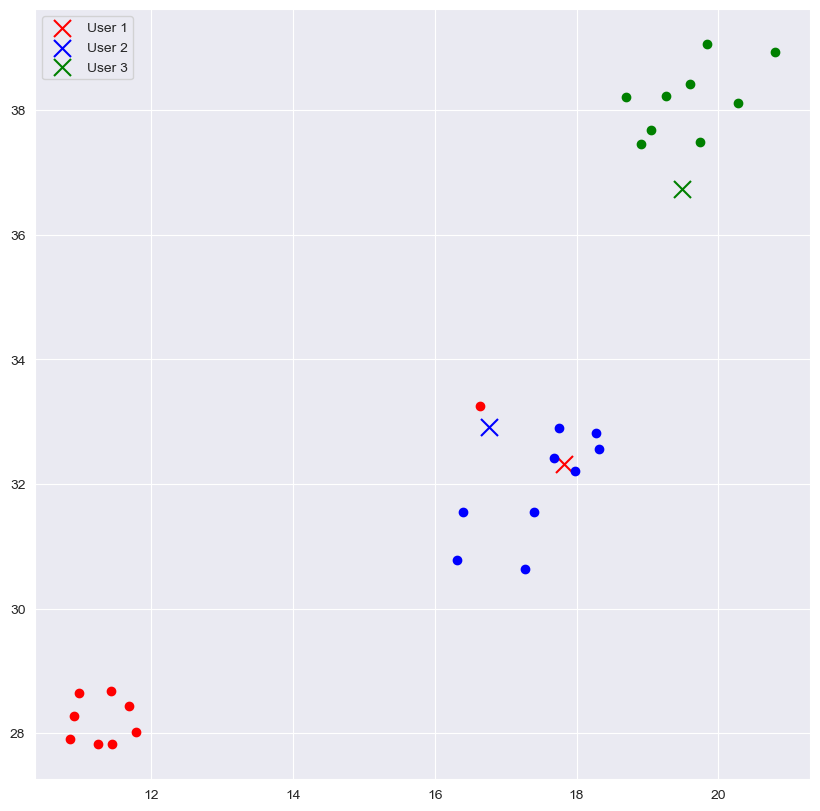

In [1224]:
def extract_embedding(user_id,model):
    user_id = tf.convert_to_tensor([user_id])
    user_embedding = model.ranking_model.user_embeddings(user_id)
    return user_embedding

def top_k_similar_animes(user_id,model,k=10):
    user_id = tf.convert_to_tensor([user_id])
    anime_embeddings = model.ranking_model.anime_embeddings(anime['anime_id'])
    user_embedding = model.ranking_model.user_embeddings(user_id)  
    genre_embeddings = model.ranking_model.genre_embeddings(anime['genre'])
   
    type_embeddings = model.ranking_model.type_embeddings(anime['type'])
    
    

    items = tf.concat([anime_embeddings, genre_embeddings,type_embeddings], axis=1)
    items = model.ranking_model.item_importance(items)

    # Compute the similarity between user and anime embeddings using cosine similarity 
    
    #extracting the top 10 anime embeddigs
    similarity = cosine_similarity(user_embedding, items)
    similarity = similarity[0]
    
    top_anime = pd.DataFrame({
        'anime_id': anime['anime_id'],
        'similarity': similarity,
    })
    
    top_anime = top_anime.sort_values(by='similarity', ascending=False).head(k)
    #returning the top k similar anime ids to the user
    return top_anime['anime_id'].values

#extracting the embeddigs of the top 10 similar animes to the user
def extract_embedding_anime(anime_id,anime,model):
    anime_id = tf.convert_to_tensor([anime_id])
    genre = anime[anime['anime_id'] == anime_id]['genre'].values
    type_ = anime[anime['anime_id'] == anime_id]['type'].values
    print(anime_id)
    print(genre)
    genre = tf.convert_to_tensor([genre])
    id_embedding = model.ranking_model.anime_embeddings(anime_id)
    genre_embedding = model.ranking_model.genre_embeddings(genre)
    type_embedding = model.ranking_model.type_embeddings(type_)
    embedding = model.ranking_model.item_importance(tf.concat([id_embedding, genre_embedding,type_embedding], axis=1))
    
    return embedding
#visulasing the embeddings 3 users and top 10 similar animes to each user 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract users 
user_id_1 = "3"
user_id_2 = "58846"
user_id_3 = "5"


user_embedding_1 = extract_embedding(user_id_1,model)
user_embedding_2 = extract_embedding(user_id_2,model)
user_embedding_3 = extract_embedding(user_id_3,model)

top_animes_1 = similarity(user_id_1,model,anime)
top_animes_2 = similarity(user_id_2,model,anime)
top_animes_3 = similarity(user_id_3,model,anime)
print(top_animes_1["anime_id"].values)


top_k_1 = [extract_embedding_anime(anime_id,anime,model) for anime_id in top_animes_1['anime_id'].values]
top_k_2 = [extract_embedding_anime(anime_id,anime,model) for anime_id in top_animes_2['anime_id'].values]
top_k_3 = [extract_embedding_anime(anime_id,anime,model) for anime_id in top_animes_3['anime_id'].values]

#using tsne to visualise the embeddings for every user and the top 10 similar animes to the user
data = np.concatenate([user_embedding_1,user_embedding_2,user_embedding_3]+top_k_1+top_k_2+top_k_3, axis=0)
# Reduce dimensionality to 2D
tsne = TSNE(metric = "cosine",perplexity=10, n_components=2,n_iter=5000)
tsne_transformed = tsne.fit_transform(data)

# Separate user and anime embeddings
user_tsne = tsne_transformed[:3]
anime_tsne = tsne_transformed[3:]

user_1 = user_tsne[0] + anime_tsne[:10]
user_2 = user_tsne[1] + anime_tsne[10:20]
user_3 = user_tsne[2] + anime_tsne[20:]
# Plot user and anime embeddings with seperating the users 3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
"""

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(user_1[0], user_1[1], user_1[2], color='red', label='User 1', s=150)
ax.scatter(user_1[3:, 0], user_1[3:, 1], user_1[3:, 2], color='red')

ax.scatter(user_2[0], user_2[1], user_2[2], color='blue', label='User 2', s=150)
ax.scatter(user_2[3:, 0], user_2[3:, 1], user_2[3:, 2], color='blue')

ax.scatter(user_3[0], user_3[1], user_3[2], color='green', label='User 3', s=150)
ax.scatter(user_3[3:, 0], user_3[3:, 1], user_3[3:, 2], color='green')
plt.legend()

plt.show()

"""
# Plot user and anime embeddings with seperating the users 
#adding the name in topof the user point 

plt.figure(figsize=(10, 10))
plt.scatter(user_1[0, 0], user_1[0, 1], color='red', label='User 1', s=150, marker='x')
plt.scatter(user_1[1:, 0], user_1[1:, 1], color='red')
plt.scatter(user_2[0, 0], user_2[0, 1], color='blue', label='User 2', s=150, marker='x')
plt.scatter(user_2[1:, 0], user_2[1:, 1], color='blue')
plt.scatter(user_3[0, 0], user_3[0, 1], color='green', label='User 3',  s=150, marker='x')
plt.scatter(user_3[1:, 0], user_3[1:, 1], color='green')
plt.legend()
plt.show()



In [913]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `anime` is your DataFrame with anime data
# `model` is your trained model

anime_id = "138"
anime_id_tensor = tf.convert_to_tensor([anime_id])  # Ensure dtype is correct
anime_genre_tensor = tf.convert_to_tensor([anime[anime['anime_id'] == anime_id]['genre'].values[0]])
# Retrieve embeddings
anime_embeddings = model.ranking_model.anime_embeddings(anime['anime_id'])
anime_embedding = model.ranking_model.anime_embeddings(anime_id_tensor)

genre_embeddings = model.ranking_model.genre_embeddings(anime['genre'])
genre_embedding = model.ranking_model.genre_embeddings(anime_genre_tensor)

# Print the name of the anime
print("Anime:", anime[anime['anime_id'] == anime_id]['name'])

# Compute cosine similarity
similarity = cosine_similarity(anime_embedding, anime_embeddings)
similarity = similarity[0]

genre_similarity = cosine_similarity(genre_embedding, genre_embeddings)
genre_similarity = genre_similarity[0]

# Debug: Check shapes and values
print("Anime Embedding Shape:", anime_embedding.shape)
print("Anime Embeddings Shape:", anime_embeddings.shape)
print("Genre Embedding Shape:", genre_embedding.shape)
print("Genre Embeddings Shape:", genre_embeddings.shape)

print("Similarity Scores:", similarity[:10])  # Print first 10 similarity scores
print("Genre Similarity Scores:", genre_similarity[:10])  # Print first 10 genre similarity scores

# Get the top 10 most similar animes
top_anime_genre = pd.DataFrame({
    'anime_id': anime['anime_id'],
    'similarity': genre_similarity
})

top_animes = pd.DataFrame({
    'anime_id': anime['anime_id'],
    'similarity': similarity
})

top_animes = top_animes.sort_values(by='similarity', ascending=False).head(10)
top_animes = top_animes.merge(anime, on='anime_id')

top_anime_genre = top_anime_genre.sort_values(by='similarity', ascending=False).head(10)
top_anime_genre = top_anime_genre.merge(anime, on='anime_id')

print("Top Animes based on Embeddings:")
print(top_animes[['anime_id', 'name', 'similarity', 'genre', 'type']])
print("Top Animes based on Genre Similarity:")
print(top_anime_genre[['anime_id', 'name', 'similarity', 'genre', 'type']])
#calculate the similarity of genre_embedding

print(cosine_similarity(genre_embedding, genre_embedding))

Anime: 202    Hunter x Hunter: Greed Island
Name: name, dtype: object
Anime Embedding Shape: (1, 32)
Anime Embeddings Shape: (12017, 32)
Genre Embedding Shape: (1, 32)
Genre Embeddings Shape: (12017, 32)
Similarity Scores: [ 0.2802441   0.00671058 -0.01699816 -0.0577371   0.0476439   0.06369467
 -0.05870564 -0.16338742 -0.10052997 -0.15971635]
Genre Similarity Scores: [-0.04357363 -0.11867829 -0.02929194 -0.16314742 -0.02929194 -0.17945272
  1.         -0.17865442 -0.02929194 -0.02929194]
Top Animes based on Embeddings:
  anime_id                                 name  similarity  \
0      138        Hunter x Hunter: Greed Island    1.000000   
1     1362         Street Fighter II: The Movie    0.629151   
2      288               Bakuten Shoot Beyblade    0.580024   
3     1342        Violence Jack: Jigoku Gai-hen    0.565264   
4    31867  Shoujo-tachi wa Kouya wo Mezasu OVA    0.562424   
5    25867                        Rolling☆Girls    0.560309   
6     9520                       